In [15]:
import serial
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
ser = serial.Serial('/dev/ttyUSB0', 9600, timeout = 2, parity=serial.PARITY_NONE, bytesize=8,  stopbits=1, xonxoff=0, )  # open serial port

ser.write(':SENS:FUNC:CONC OFF \r'.encode()) # Desligua as funções simultâneas
ser.write(':SOUR:FUNC VOLT \r'.encode()) # Função fonte de volts
ser.write(':SENS:FUNC "CURR:DC" \r'.encode()) # Função, medida de corrrente
ser.write(':SENS:CURR:PROT 0.04 \r'.encode()) # Corrente proteção 40mA
ser.write(':SOUR:VOLT:START -5 \r'.encode()) # Voltagem começa -5V
ser.write(':SOUR:VOLT:STOP 5 \r'.encode()) # Voltagem termina 5V
ser.write(':SOUR:VOLT:STEP 2E-2 \r'.encode()) # paso de voltagem 0.02V
ser.write(':SOUR:VOLT:MODE SWE \r'.encode()) #  Modo de varredura em volts
ser.write(':SOUR:SWE:RANG AUTO \r'.encode()) # Variação automática de fonte.
ser.write(':SOUR:SWE:SPAC LIN \r'.encode()) # Varredura em escada linear
ser.write(':TRIG:COUN 501 \r'.encode()) # Numero de pontos de varredura.
ser.write(':SOUR:DEL 0.01 \r'.encode()) # atraso da fonte de 100 ms
ser.write(':OUTP ON \r'.encode()) # Ativar a saída da fonte
ser.write(':READ? \r'.encode()) # Ativar varredura, solicitar dados


Corrente = ser.readlines()
print(Corrente)

    
ser.write(':OUTP OFF \r'.encode()) # Desligar a saida

ser.close()

[b'-5.000000E+00,-3.999957E-02,+9.910000E+37,+1.895361E+04,+2.151600E+04,-4.980000E+00,-3.999966E-02,+9.910000E+37,+1.895367E+04,+2.151600E+04,-4.960000E+00,-3.999976E-02,+9.910000E+37,+1.895374E+04,+2.151600E+04,-4.940000E+00,-3.999962E-02,+9.910000E+37,+1.895381E+04,+2.151600E+04,-4.920000E+00,-3.999970E-02,+9.910000E+37,+1.895388E+04,+2.151600E+04,-4.900000E+00,-3.999968E-02,+9.910000E+37,+1.895395E+04,+2.151600E+04,-4.880000E+00,-3.999970E-02,+9.910000E+37,+1.895402E+04,+2.151600E+04,-4.860000E+00,-3.999976E-02,+9.910000E+37,+1.895409E+04,+2.151600E+04,-4.840000E+00,-3.999973E-02,+9.910000E+37,+1.895416E+04,+2.151600E+04,-4.820000E+00,-3.999963E-02,+9.910000E+37,+1.895423E+04,+2.151600E+04,-4.800000E+00,-3.999973E-02,+9.910000E+37,+1.895430E+04,+2.151600E+04,-4.780000E+00,-3.999970E-02,+9.910000E+37,+1.895437E+04,+2.151600E+04,-4.760000E+00,-3.999950E-02,+9.910000E+37,+1.895444E+04,+2.151600E+04,-4.740000E+00,-3.999973E-02,+9.910000E+37,+1.895451E+04,+2.151600E+04,-4.720000E+00,-3.

In [108]:
caminho = '/home/luis11/Documentos/Keithley/Resistência100Ohm-IvsV/300K_IvsV_resistencia.txt'

with open(caminho, mode="w") as f:
#     f.write('TensãovsCorrente\n')
    f.writelines(repr(Corrente))

In [75]:
a = np.genfromtxt('170K_IvsV_resistencia.txt', delimiter=',', dtype= None)
a

array([-5.000000e+00, -3.999947e-02,  9.910000e+37, ...,  9.910000e+37,
        7.282832e+03,  2.151600e+04])

In [76]:
a = np.reshape(a, (501, 5))
print(a)

[[-5.000000e+00 -3.999947e-02  9.910000e+37  7.247552e+03  2.151600e+04]
 [-4.980000e+00 -3.999940e-02  9.910000e+37  7.247621e+03  2.151600e+04]
 [-4.960000e+00 -3.999953e-02  9.910000e+37  7.247691e+03  2.151600e+04]
 ...
 [ 4.960000e+00  4.000392e-02  9.910000e+37  7.282691e+03  2.151600e+04]
 [ 4.980000e+00  4.000397e-02  9.910000e+37  7.282762e+03  2.151600e+04]
 [ 5.000000e+00  4.000383e-02  9.910000e+37  7.282832e+03  2.151600e+04]]


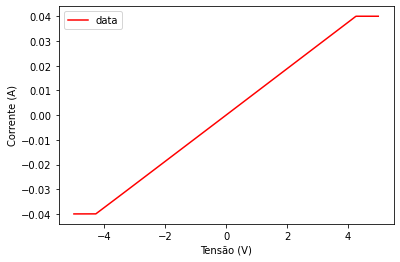

In [77]:
x= a[:,0]
y= a[:,1]

# Plot:
plt.figure(1)
plt.plot(x, y, color='r', label='data')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.legend()
plt.show()

In [78]:
z = np.polyfit(a[150: 350, 1], a[150: 350, 0], 1)
z

array([1.06967927e+02, 7.08720135e-04])